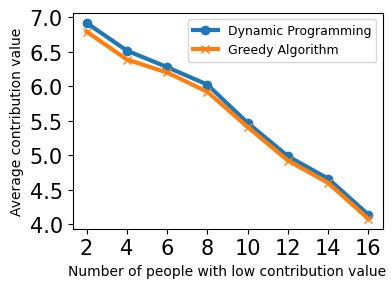

In [2]:
import random

def generate_data(num_low):
    scores = [round(random.uniform(0, 0.5), 2) for _ in range(num_low)] + [round(random.uniform(0.5, 1), 2) for _ in range(20-num_low)]
    costs = [round(random.uniform(0.1, 1), 2) for _ in range(20)]
    return scores, costs

def dp_method(scores, costs, B):
    dp = [[0 for _ in range(int(B*100)+1)] for _ in range(21)]
    for i in range(1, 21):
        for j in range(1, int(B*100)+1):
            dp[i][j] = dp[i-1][j]
            if j >= int(costs[i-1]*100):
                dp[i][j] = max(dp[i][j], dp[i-1][j-int(costs[i-1]*100)] + scores[i-1])
    used_budget = B - (dp[20][int(B*100)] - dp[20][int(B*100) - 1])
    return dp[20][int(B*100)], used_budget

def greedy_method(scores, costs, B):
    people_with_ratio = [(i, scores[i] / costs[i]) for i in range(20)]
    people_with_ratio.sort(key=lambda x: x[1], reverse=True)
    greedy_score = 0
    remaining_budget = B
    for i, ratio in people_with_ratio:
        if remaining_budget >= costs[i]:
            greedy_score += scores[i]
            remaining_budget -= costs[i]
    used_budget = B - remaining_budget
    return greedy_score, used_budget
import random
import matplotlib.pyplot as plt

# ... [其他函数代码: generate_data, dp_method, greedy_method]

B = 3  # Example budget

dp_scores_list = []
greedy_scores_list = []
dp_costs_list = []
greedy_costs_list = []

for num_low in range(2, 17, 2):  # 2, 4, 6,..., 16
    dp_score_total = 0
    greedy_score_total = 0
    dp_cost_total = 0
    greedy_cost_total = 0
    for _ in range(100):
        scores, costs = generate_data(num_low)
        dp_score, dp_cost = dp_method(scores, costs, B)
        greedy_score, greedy_cost = greedy_method(scores, costs, B)

        dp_score_total += dp_score
        greedy_score_total += greedy_score
        dp_cost_total += dp_cost
        greedy_cost_total += greedy_cost

    dp_scores_list.append(dp_score_total / 100)
    greedy_scores_list.append(greedy_score_total / 100)
    dp_costs_list.append(dp_cost_total / 100)
    greedy_costs_list.append(greedy_cost_total / 100)

# Plotting scores
x_labels = [str(i) for i in range(2, 17, 2)]
x = range(len(x_labels))

line_width = 3
label_font_size = 10
legend_font_size = 9
tick_font_size = 15
marker_size = 6
plt.figure(figsize=(4, 2.8))
plt.plot(x, dp_scores_list, marker='o', label='Dynamic Programming',linewidth=line_width, markersize=marker_size)
plt.plot(x, greedy_scores_list, marker='x', label='Greedy Algorithm',linewidth=line_width, markersize=marker_size)
plt.xticks(x, x_labels)
plt.xlabel('Number of people with low contribution value',fontsize=label_font_size)
plt.ylabel('Average contribution value',fontsize=label_font_size)
plt.xticks(fontsize=tick_font_size)
plt.yticks(fontsize=tick_font_size)
plt.legend(fontsize=legend_font_size)
plt.savefig('/content/drive/MyDrive/实验图/图11.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()




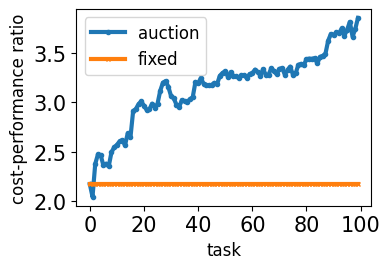

In [8]:
import random
import matplotlib.pyplot as plt
import copy
label_font_size=40
class User:
    def __init__(self, score, cost, strategy='auction'):
        self.score = round(score, 2)
        self.cost = round(cost, 2)
        self.strategy = strategy
        self.virtual_points = 0.00
        if strategy == 'fixed':
            self.bid = round(random.uniform(self.cost, self.cost * 1.5), 2)
        else:
            self.bid = round(random.uniform(self.cost, self.cost * 1.5), 2)
        self.selected = False

    def update_bid(self):
        if self.strategy == 'fixed':
            return
        if self.selected:
            self.bid = round(self.bid * 1.1, 2)
        else:
            self.bid = round(self.bid * 0.8, 2)

def generate_user(bad_ratio, strategy='auction'):
    if random.random() < bad_ratio:
        score = round(random.uniform(0.1, 0.5), 2)
    else:
        score = round(random.uniform(0.5, 1), 2)
    cost = round(random.uniform(0.1, 1), 2)
    return User(score, cost, strategy)

def knapsack_01(scores, costs, budget):
    n = len(scores)
    W = int(budget * 100)
    dp = [[0 for w in range(W + 1)] for i in range(n + 1)]
    for i in range(1, n + 1):
        for w in range(W + 1):
            if int(costs[i-1] * 100) <= w:
                dp[i][w] = max(dp[i-1][w], dp[i-1][w - int(costs[i-1] * 100)] + scores[i-1])
            else:
                dp[i][w] = dp[i-1][w]

    total_value = dp[n][W]
    total_cost = W

    # Retrieve the selected items (backtracking)
    w = W
    selected_items = []
    for i in range(n, 0, -1):
        if dp[i][w] != dp[i-1][w]:
            selected_items.append(i-1)
            w -= int(costs[i-1] * 100)

    return total_value, selected_items

def solve_dp_with_indices(scores, costs):
    max_value, selected_indices = knapsack_01(scores, costs, 300)
    total_cost = sum([costs[i] for i in selected_indices])
    return total_cost, max_value, selected_indices

def simulate_auction_with_ratios(ratio, iterations=100):
    auction_users = [generate_user(ratio, 'auction') for _ in range(20)]
    fixed_users = copy.deepcopy(auction_users)
    for user in fixed_users:
        user.strategy = 'fixed'
    auction_bids_sum = []
    fixed_bids_sum = []
    auction_scores_sum = []
    fixed_scores_sum = []
    for _ in range(iterations):
        auction_scores = [int(user.score * 100) for user in auction_users]
        auction_bids = [int((user.bid - user.virtual_points) * 100) for user in auction_users]
        fixed_scores = [int(user.score * 100) for user in fixed_users]
        fixed_bids = [int(user.bid * 100) for user in fixed_users]

        _, _, selected_auction_indices = solve_dp_with_indices(auction_scores, auction_bids)
        _, _, selected_fixed_indices = solve_dp_with_indices(fixed_scores, fixed_bids)

        auction_bids_sum.append(sum([u.bid for i, u in enumerate(auction_users) if i in selected_auction_indices]))
        fixed_bids_sum.append(sum([u.bid for i, u in enumerate(fixed_users) if i in selected_fixed_indices]))
        auction_total_score = sum([u.score for i, u in enumerate(auction_users) if i in selected_auction_indices])
        fixed_total_score = sum([u.score for i, u in enumerate(fixed_users) if i in selected_fixed_indices])
        auction_scores_sum.append(auction_total_score)
        fixed_scores_sum.append(fixed_total_score)

        for i, user in enumerate(auction_users):
            user.selected = i in selected_auction_indices
            user.update_bid()
            if user.bid < user.cost:
                auction_users[i] = generate_user(ratio, 'auction')

    return auction_bids_sum, fixed_bids_sum, auction_scores_sum, fixed_scores_sum

# 主执行代码
auction_bids_sum, fixed_bids_sum, auction_scores_sum, fixed_scores_sum = simulate_auction_with_ratios(0.2)

# 计算性价比
auction_value_to_cost_ratios = [score/bid if bid != 0 else 0 for score, bid in zip(auction_scores_sum, auction_bids_sum)]
fixed_value_to_cost_ratios = [score/bid if bid != 0 else 0 for score, bid in zip(fixed_scores_sum, fixed_bids_sum)]

line_width = 3
label_font_size = 12
legend_font_size = 12
tick_font_size = 15
marker_size = 3
# 使用matplotlib绘图
iterations = range(100)
plt.figure(figsize=(4, 2.8))
plt.plot(iterations, auction_value_to_cost_ratios, label='auction', marker='o',linewidth=line_width, markersize=marker_size)
plt.plot(iterations, fixed_value_to_cost_ratios, label='fixed', marker='x',linewidth=line_width, markersize=marker_size)
plt.xlabel('task',fontsize=label_font_size)
plt.ylabel('cost-performance ratio',fontsize=label_font_size)
plt.xticks(fontsize=tick_font_size)
plt.yticks(fontsize=tick_font_size)
plt.legend(fontsize=legend_font_size)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/实验图/图12.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()


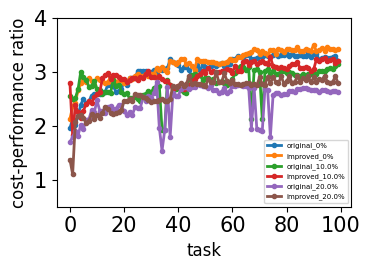

In [12]:
import random
import matplotlib.pyplot as plt

class User:
    def __init__(self, score, cost, malicious=False):
        self.score = round(score, 2)
        self.cost = round(cost, 2)
        self.malicious = malicious
        self.virtual_points = 0.00
        self.last_increment = 0.04  # 初始增量设置为0.02
        if self.malicious:
            self.bid = 1.5
        else:
            self.bid = round(random.uniform(self.cost, self.cost * 1.5), 2)
        self.selected = False

    def update_bid(self, improved=False):
        if self.selected:
            self.virtual_points = 0  # 如果被选中，重置虚拟积分为0
            self.last_increment = 0.04  # 成功后，将增量重置为初始值0.02
            self.bid = round(self.bid * 1.1, 2)
        else:
            if improved:
                self.virtual_points += self.last_increment
                self.last_increment *= 0.5  # 递减增量

            else:
                self.virtual_points += 0.04  # 固定增加0.02
            if self.malicious:
              self.bid=1.5
            else:
              self.bid = round(self.bid * 0.8, 2)

def generate_user(bad_ratio):
    is_malicious = random.random() < bad_ratio
    if is_malicious:
        score = round(random.uniform(0.1, 0.5), 2)
        cost = round(random.uniform(0.1, 1), 2)
        return User(score, cost, True)
    else:
        score = round(random.uniform(0.5, 1), 2)
        cost = round(random.uniform(0.1, 1), 2)
        return User(score, cost)
def knapsack_01(scores, costs, budget):
    n = len(scores)
    W = int(budget * 100)
    dp = [[0 for w in range(W + 1)] for i in range(n + 1)]
    for i in range(1, n + 1):
        for w in range(W + 1):
            if int(costs[i-1] * 100) <= w:
                dp[i][w] = max(dp[i-1][w], dp[i-1][w - int(costs[i-1] * 100)] + scores[i-1])
            else:
                dp[i][w] = dp[i-1][w]

    total_value = dp[n][W]
    total_cost = W

    # Retrieve the selected items (backtracking)
    w = W
    selected_items = []
    for i in range(n, 0, -1):
        if dp[i][w] != dp[i-1][w]:
            selected_items.append(i-1)
            w -= int(costs[i-1] * 100)

    return total_value, selected_items

def solve_dp_with_indices(scores, costs):
    max_value, selected_indices = knapsack_01(scores, costs, 300)
    total_cost = sum([costs[i] for i in selected_indices])
    return total_cost, max_value, selected_indices

def simulate_auction_with_ratios(ratio, iterations=100, improved=False, auction_users=None):
    auction_bids_sum = []
    auction_scores_sum = []


    for _ in range(iterations):
        auction_scores = [int(user.score * 100) for user in auction_users]
        auction_bids = [int((user.bid - user.virtual_points) * 100) for user in auction_users]

        _, _, selected_auction_indices = solve_dp_with_indices(auction_scores, auction_bids)
        auction_bids_sum.append(sum([u.bid for i, u in enumerate(auction_users) if i in selected_auction_indices]))
        auction_total_score = sum([u.score for i, u in enumerate(auction_users) if i in selected_auction_indices])
        auction_scores_sum.append(auction_total_score)
        for i, user in enumerate(auction_users):
            user.selected = i in selected_auction_indices
            user.update_bid(improved)  # 传入是否为改进的方法
            if user.bid < user.cost:
                auction_users[i] = generate_user(0)

    return auction_bids_sum, auction_scores_sum


# 主执行代码
ratios = [0, 0.1, 0.2]
results = {}


for ratio in ratios:  # 首先遍历比例
    auction_users_original = [generate_user(ratio) for _ in range(20)]
    for improved_method in [False, True]:  # 然后遍历方法：原始和改进
        method = 'improved' if improved_method else 'original'
        key = f"{method}_{ratio*100}%"
        results[key] = simulate_auction_with_ratios(ratio, improved=improved_method, auction_users=auction_users_original.copy())

# 使用matplotlib绘图
iterations = range(100)
plt.figure(figsize=(4, 2.8))
line_width = 2
label_font_size = 12
legend_font_size = 5
tick_font_size = 15
marker_size = 3
for key, value in results.items():
    value_to_cost_ratios = [score/bid if bid != 0 else 0 for score, bid in zip(value[1], value[0])]
    plt.plot(iterations, value_to_cost_ratios, label=key, marker='o',linewidth=line_width, markersize=marker_size)

plt.xlabel('task',fontsize=label_font_size)
plt.ylabel('cost-performance ratio',fontsize=label_font_size)
plt.ylim([0.5, 4])
plt.xticks(fontsize=tick_font_size)
plt.yticks(fontsize=tick_font_size)
plt.legend(fontsize=legend_font_size)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/实验图/图13.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()



